In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/Users/harshsinha/VS Code/DataScience-Udemy/ML-DL-NLP/Lectures/Section - 23 EDA/Cleaned_Google_Playstore_Dataset.csv")

In [6]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [7]:
df.duplicated('App').sum()
# 1181 duplicates

np.int64(1181)

In [8]:
df.drop_duplicates('App', inplace=True)

In [9]:
df.duplicated('App').sum()

np.int64(0)

In [10]:
df.shape    

(9659, 15)

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
category_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# Print
print(f"We have {len(numeric_features)} numeric features")
print(f"We have {len(category_features)} category features")

We have 8 numeric features
We have 7 category features


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Day             9659 non-null   int64  
 13  Month           9659 non-null   int64  
 14  Year            9659 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


# Feature Information

1. App :- Name of the App

2. Category:- Category under which the App falls.

3. Rating :- Application's rating on playstore

4. Reviews :- Number of reviews of the App.

5. Size:- Size of the App.

6. Install :- Number of Installs of the App

7. Type :- If the App is free/paid

8. Price :- Price of the app (0 if it is Free)

9. Content Rating:- Appropiate Target Audience of the App.

10. Genres:- Genre under which the App falls.

11. Last Updated :- Date when the App was last updated

12. Current Ver:- Current Version of the Application

13. Android Ver:- Minimum Android Version required to run the App

In [13]:
# Proportion of count data on category features
for feature in category_features:
    print(df[feature].value_counts(normalize=True)*100)
    print("\n")
    print("=="*40)

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64


Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3

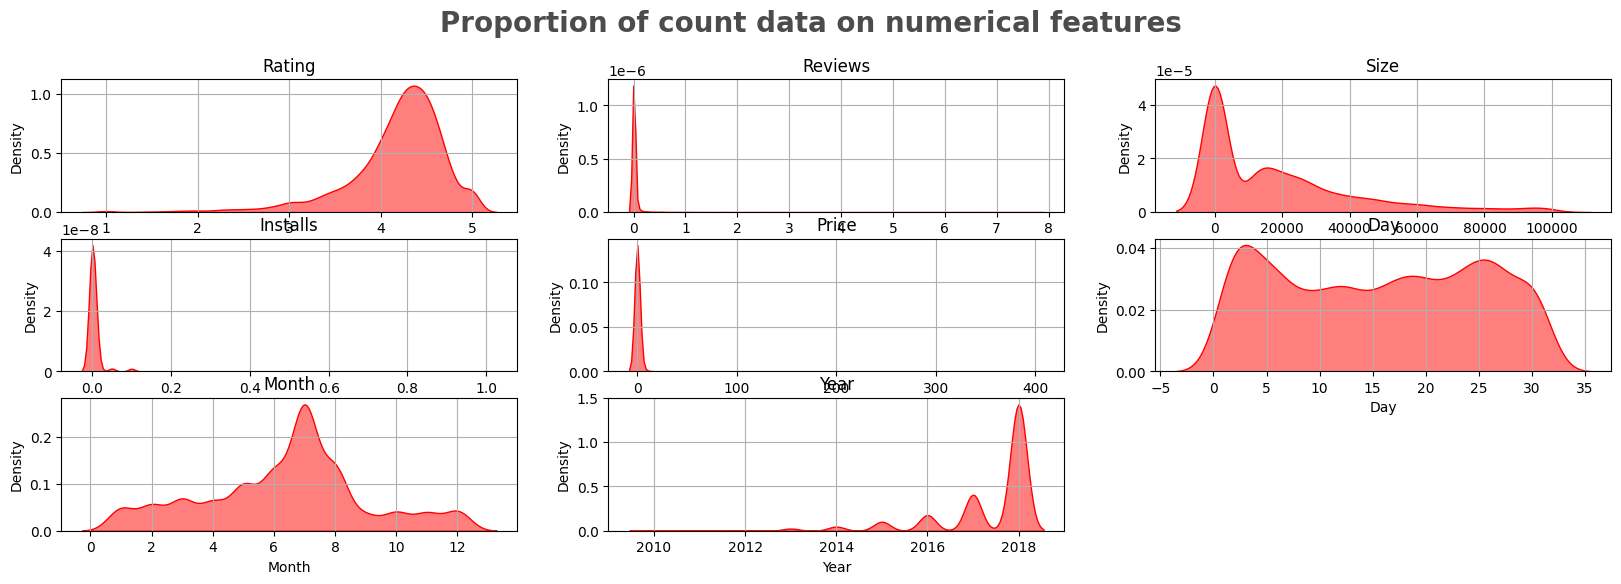

In [14]:
# Proportion of count data on numerical features
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 10))
plt.suptitle("Proportion of count data on numerical features", fontsize=20, fontweight='bold', alpha=0.7, y = 0.95) 

for i in range(len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[numeric_features[i]], fill=True, alpha=0.5, color='r')
    plt.title(f"{numeric_features[i]}")
    plt.xlabel(f"{numeric_features[i]}")
    plt.ylabel("Density")
    plt.grid()

Therefore, Rating and Year is Left Skewed and rest are Right Skewed

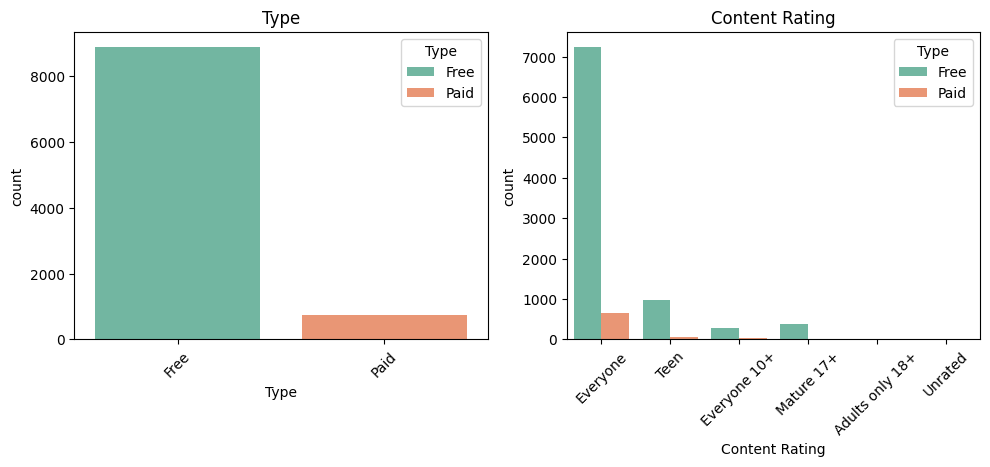

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


category = ['Type', 'Content Rating']  


plt.figure(figsize=(10, 8))  
for i in range(len(category)):
    plt.subplot(2, 2, i+1)  
    sns.countplot(x=df[category[i]], palette='Set2', hue=df['Type'])  
    plt.title(f"{category[i]}")
    plt.xlabel(f"{category[i]}")
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [18]:
# Most Popular App Category
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

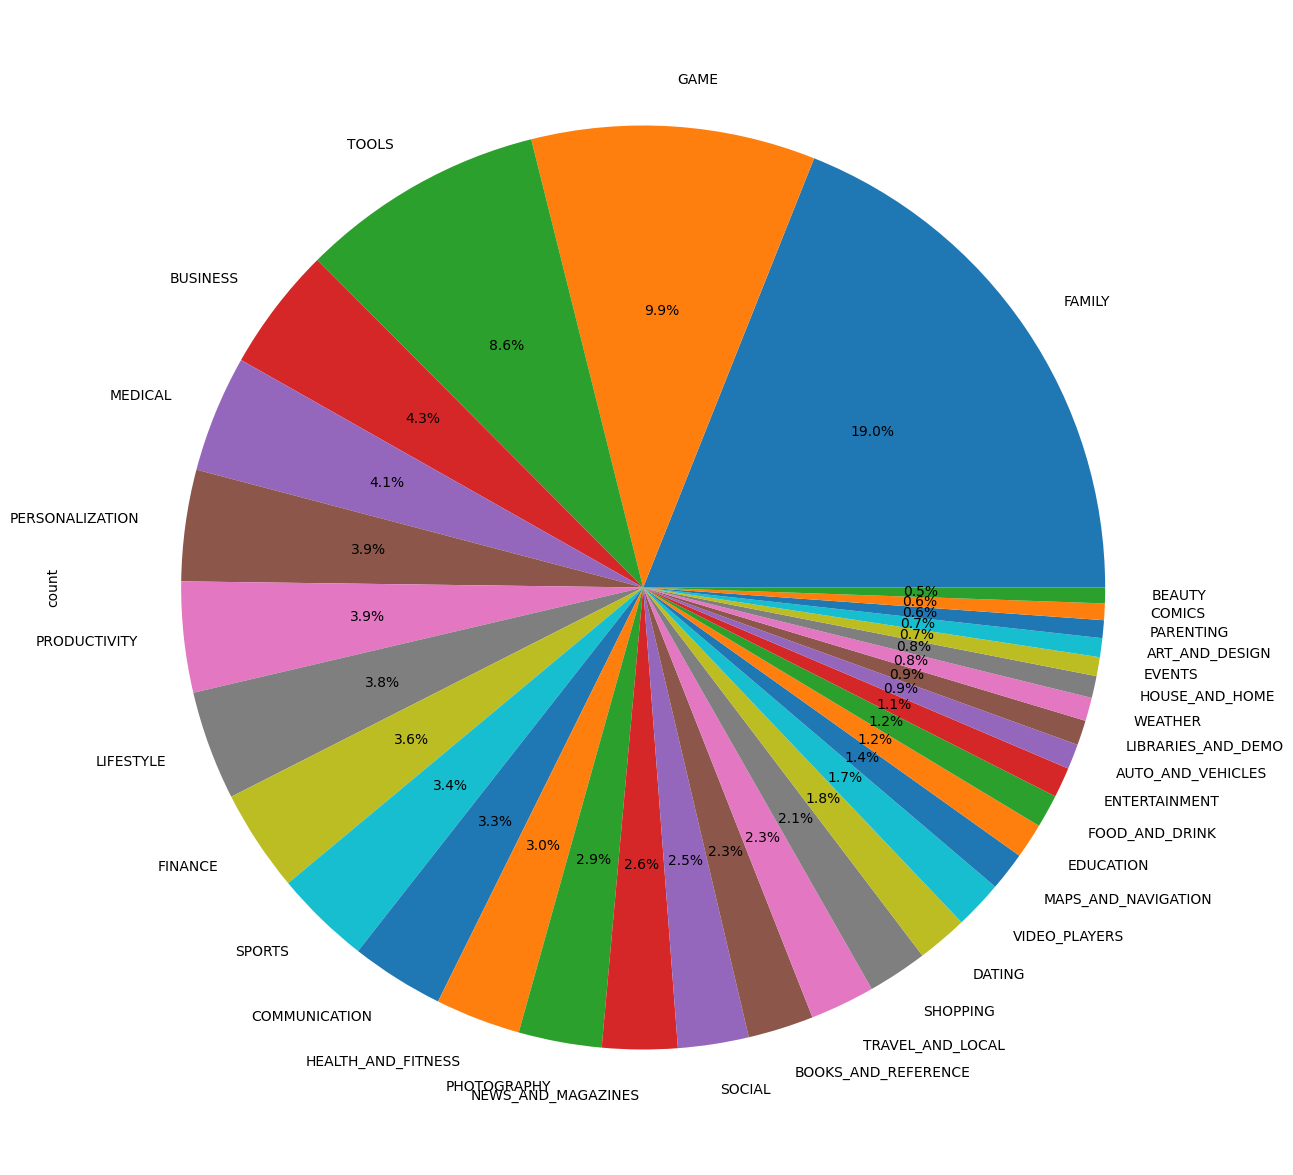

In [20]:
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

Observations
1. Most of the apps are free
2. Most of the apps are for everyone
3. Family and Game are the most popular categories
4. Beauty, Comics, and Parenting are the least popular categories

Text(0, 0.5, 'Count')

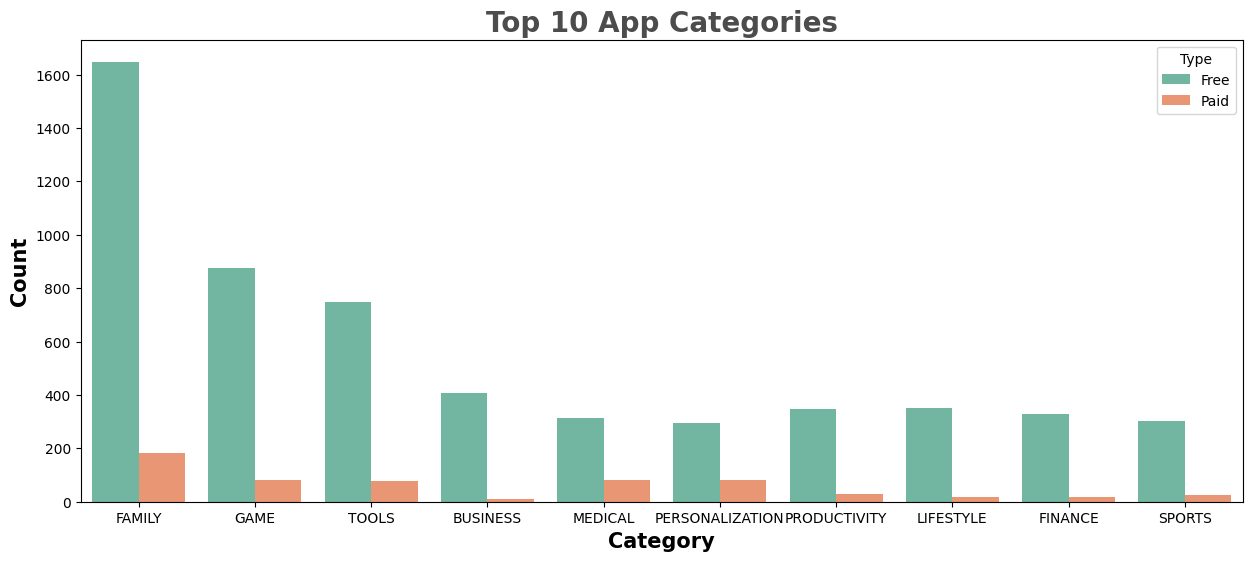

In [32]:
# Top 10 app categories
plt.figure(figsize=(15, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index[:10], hue='Type', palette='Set2')
plt.title("Top 10 App Categories", fontsize=20, fontweight='bold', alpha=0.7)
plt.xlabel("Category", fontsize=15, fontweight='bold')
plt.ylabel("Count", fontsize=15, fontweight='bold')

In [33]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


1. Category with largest number of installations
2. Top 5 most installed app in each popular category
3. How many apps with 5 star ratings?

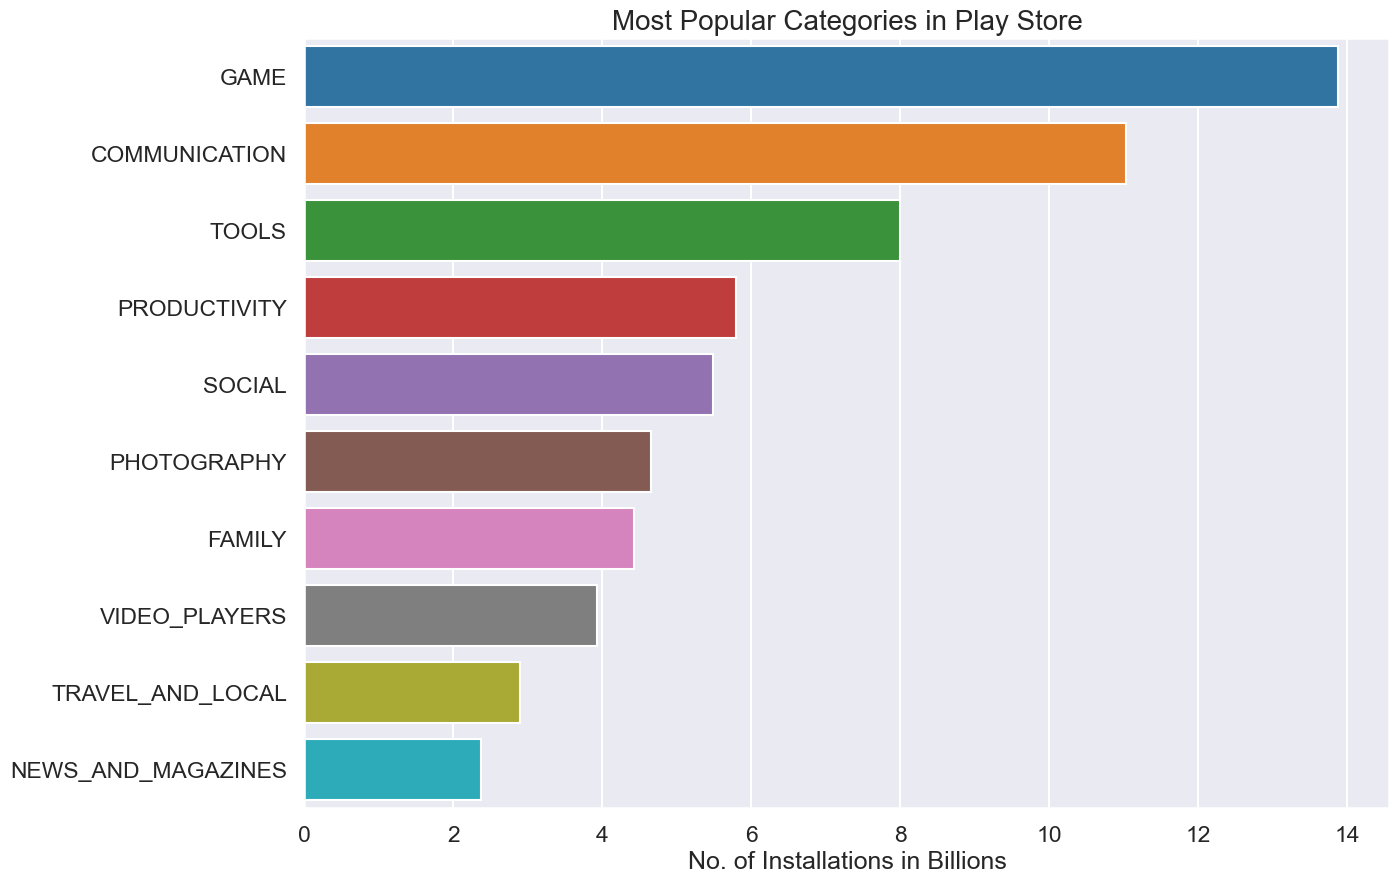

In [43]:
# Category with largest number of installations
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs / 1000000000  # converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize=(14, 10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x='Installs', y='Category', data=df2, hue='Category')
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size=20)
plt.show()

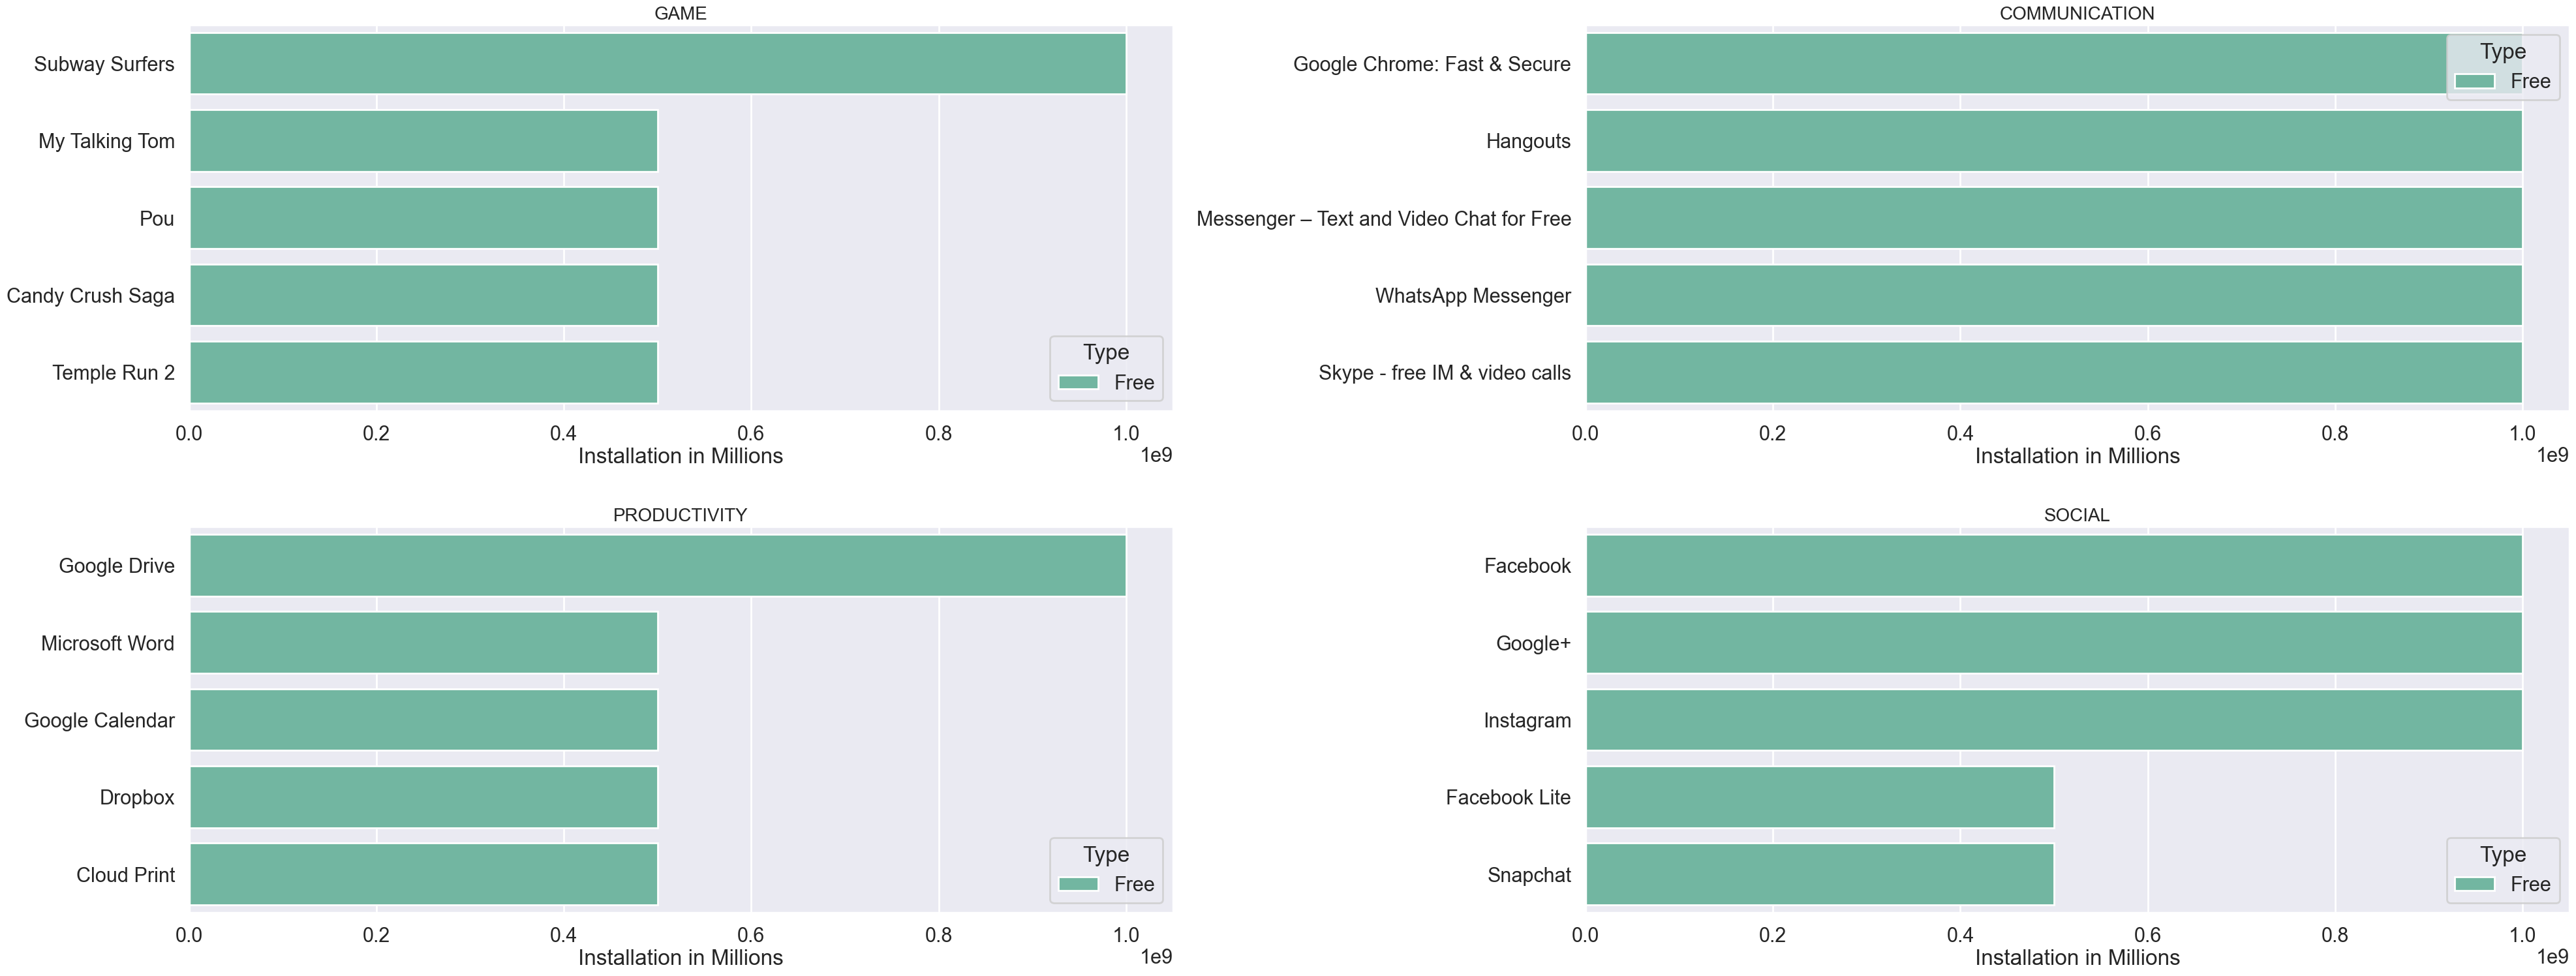

In [45]:
# Top 5 most installed app in each popular category
# Assuming a category is popular if it is in top 4 of category with largest number of installations
dfa = df.groupby(['Category', 'App', 'Type'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending=False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40, 30))

for i, app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4, 2, i + 1)
    sns.barplot(data=df3, x='Installs', y='App', hue='Type', palette='Set2')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app, size=20)

plt.tight_layout()
plt.subplots_adjust(hspace=.3)
plt.show()

In [46]:
# 5 star

rating = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0
